# Plan of Attack

* Dataset contains 7 columns as follows

 - age: age of primary beneficiary

 - sex: insurance contractor gender, female, male

 - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
 - objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

 - children: Number of children covered by health insurance / Number of dependents

 - smoker: Smoking

 - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

 - charges: Individual medical costs billed by health insurance

* Our aim is to predict medical cost of patient given his/her details like age, sex, bmi and so on. This model will be useful to insurance company to predict the medical cost they might need to pay while giving insurance to customer.

* In this notebook 

1. We are going to make analysis of each feature and its relation with target variable which is 'charges'.
2. We will be trying various regression models like LinearRegression , RandomForestRegressor , XGBOOST , CatBoost , LightGBM etc.
3. We will be using Optuna to fine tune the hyperparametrs of our model.
4. Finally, blending top 3 models based on R2_Score.


# Importing required libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import catboost as cb
import lightgbm as lgb

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are 3 categorical features in this dataset - Sex, Smoker and region. Rest of the columns are numeric features.

In [4]:
df.shape


(1338, 7)

In [5]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Yay !! No Null Values !**

Now lets analyse each column of the dataset and see if we get any hidden information or is there any correlation with target feature.

[]

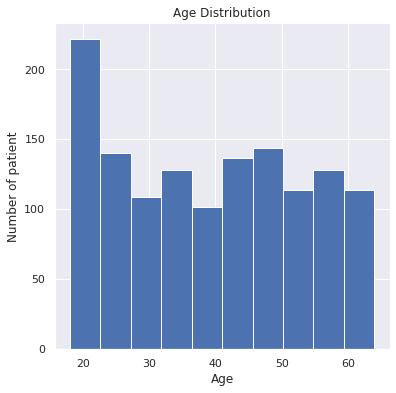

In [7]:
sns.set()
plt.figure(figsize=(6,6))
plt.hist(df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of patient')
plt.plot()

It is suprisingly clear that there are more number of teen patients of age around 20-22. Lets see what are the charges like for each age group. 

[]

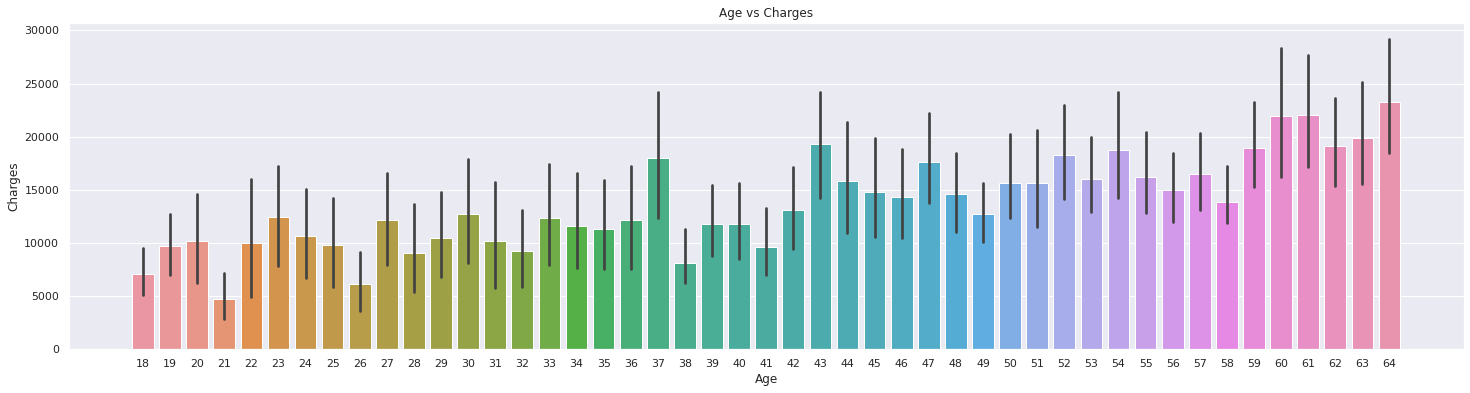

In [8]:
sns.set()
plt.figure(figsize=(25,6))
sns.barplot(x=df['age'] , y=df['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.plot()

People who are old have record of large medical costs which is not surprising.

Lets see how many Mens and womens counts are there in our dataset.

[]

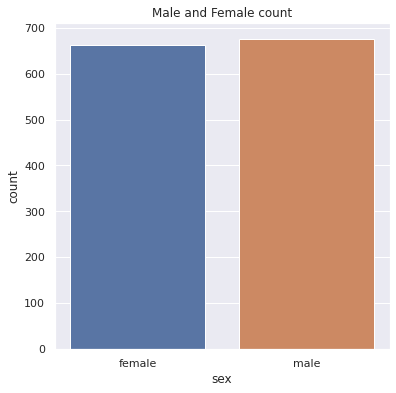

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=df['sex'])
plt.title('Male and Female count')
plt.plot()

There are almost equal count of mens and womens. Lets check if there is any relation between sex and charges.

[]

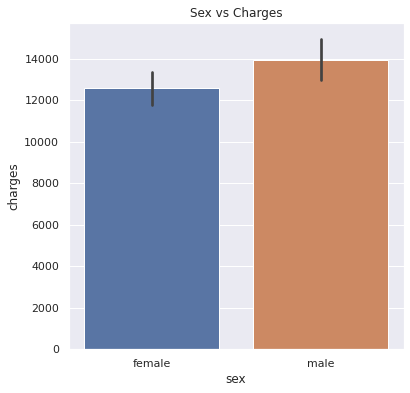

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.barplot(x=df['sex'] , y = df['charges'])
plt.title('Sex vs Charges')
plt.plot()

Medical cost for mens is slighlt higher as compared to womens but there is no significant difference. Let's check how many smoker mens and womens are there.

First let's see how many smoking and non smoking patients are there.

[]

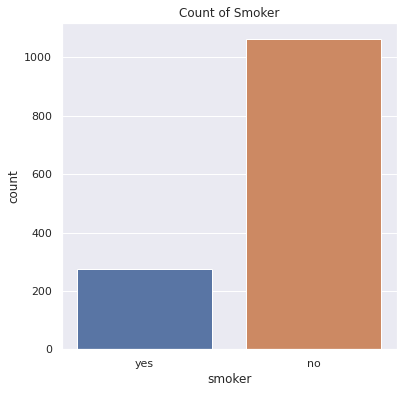

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=df['smoker'])
plt.title('Count of Smoker')
plt.plot()

Large number of patients are non smoker

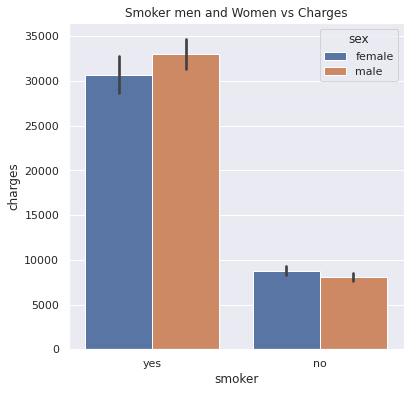

In [12]:
plt.figure(figsize=(6,6))
sns.barplot(x = df['smoker'] , y = df['charges'],hue=df['sex'])
plt.title('Smoker men and Women vs Charges')
plt.show()

From above graph it can be seen that, medical cost for smokers men and women is almost 3 times as compared to non smoker men and women.

Let's check relation between BMI and medical cost.

/home/omkar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

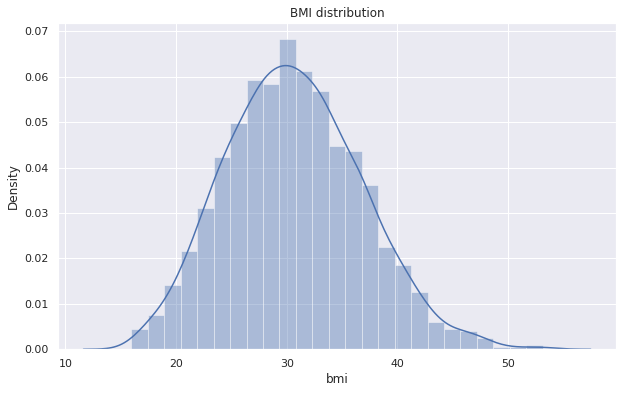

In [13]:
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.plot()

[]

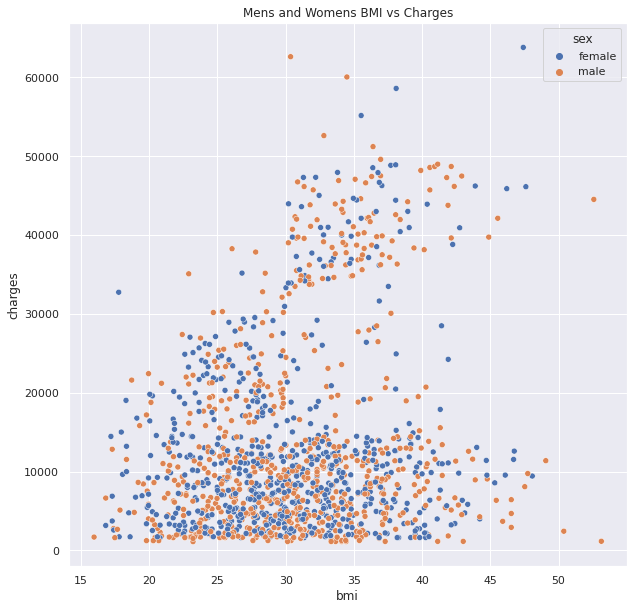

In [14]:
sns.set()
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['bmi'] , y = df['charges'],hue=df['sex'])
plt.title('Mens and Womens BMI vs Charges')
plt.plot()

From above plot it is clear that, mens with BMI in range (30 - 45) have hight medical cost as compared to women.

/home/omkar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


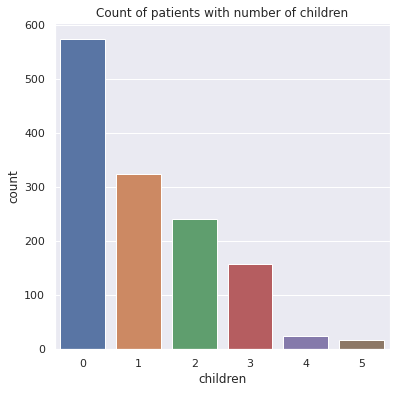

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['children'])
plt.title('Count of patients with number of children')
plt.show()

Above graph describes number of patients with children count = 0,1,2,3,4,5. Let's check if number of childrens affect the medical cost.

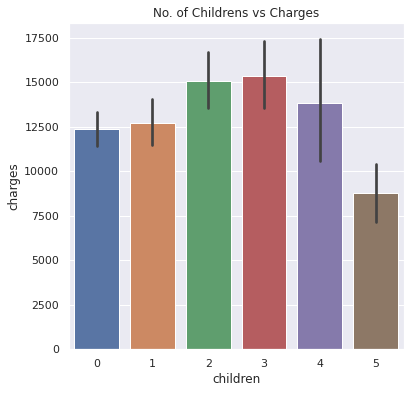

In [16]:
plt.figure(figsize=(6,6))
sns.barplot(x = df['children'] , y = df['charges'])
plt.title('No. of Childrens vs Charges')
plt.show()

There is no any significant difference in medical cost based on number of children patient has. 

Let's check how many number of patients belong to which region.

[]

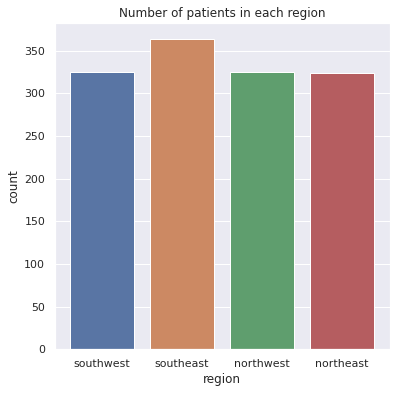

In [17]:
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x=df['region'])
plt.title('Number of patients in each region')
plt.plot()

There are almost same number of patients from each region but slightly greater in southeast region. Let's see what is relation between region and charges.

[]

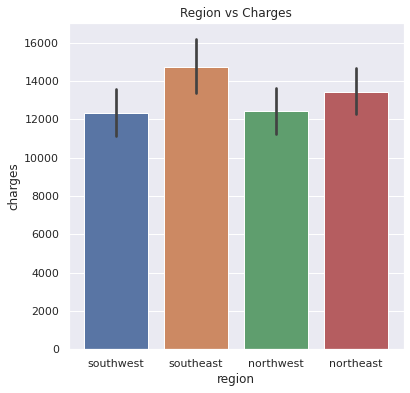

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.barplot(x = df['region'] , y=df['charges'])
plt.title('Region vs Charges')
plt.plot()

Finally , let's check how charges are distributed.

/home/omkar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

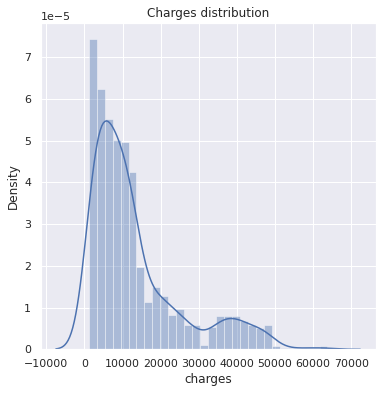

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges distribution')
plt.plot()

# Model Building  - Optuna tuning - Bleding

We have 3 categorical columns - Sex , Smoker and Region. We are using Onehotencoder to transform this categorical features into numerical features. 

We are not fitting or transforming features right now. We have just made one transformer which does job as we have specified which is onehotencoding specified features. We will be using this created transformer 'trf' in pipeline ahead.

In [20]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['sex','smoker','region'])
]
,remainder='passthrough')


* Splitting train and test state. We have made 80 - 20 split.

In [21]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0 )

In [22]:
x_train.shape,y_train.shape

((1070, 6), (1070,))

In [23]:
x_test.shape,y_test.shape

((268, 6), (268,))

Now here we have made one list containing tuple, where each tuple contains model name and model itself. 

We will be using this **models** list to fit and predict using each model and find top 3 models based on R2_score for blending and tuning.

In [24]:
models = [
    ('Linear Regression', LinearRegression()),
    ('XGBoost Regressor' , xgb.XGBRegressor()),
    ('Random Forest' , RandomForestRegressor()),
    ('Decision Tree',DecisionTreeRegressor()),
    ('Cat Boost' , cb.CatBoostRegressor(verbose= 0)),
    ('Light GBM',lgb.LGBMRegressor())
]

In below snippet we have created pipeline which contains 3 steps - 

1. Transformer that we have created earlier which is encoding categorical features
2. Standard scaler used for standardizing all features as there are some features which have wide value range i.e age (18-64) and features which have small value range i.e children (0-5).
3. model used.

This pipeline is fitted and used for prediction with each model from 'models' list and r2_score for each model is stored in result dictionary.

In [25]:
result = dict()
for name,model in models:
    pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',model)
    ])

    pipe.fit(x_train,y_train)
    y_test_pred = pipe.predict(x_test)
    result[name] = r2_score(y_test,y_test_pred)

Converting dictionary 'result' into dataframe.

In [26]:
result = pd.DataFrame([result]).T
result.rename(columns={0:'R2 Score'},inplace=True)
result = result.sort_values(by = 'R2 Score',ascending=False)
result

,R2 Score
Cat Boost,0.896466
Light GBM,0.879594
Random Forest,0.877754
XGBoost Regressor,0.850272
Linear Regression,0.799988
Decision Tree,0.701170


As can be seen from above snippet , Catboost, LightGBM , RandomForest and XGBoost are the top performing models. We can visualize the same as below.

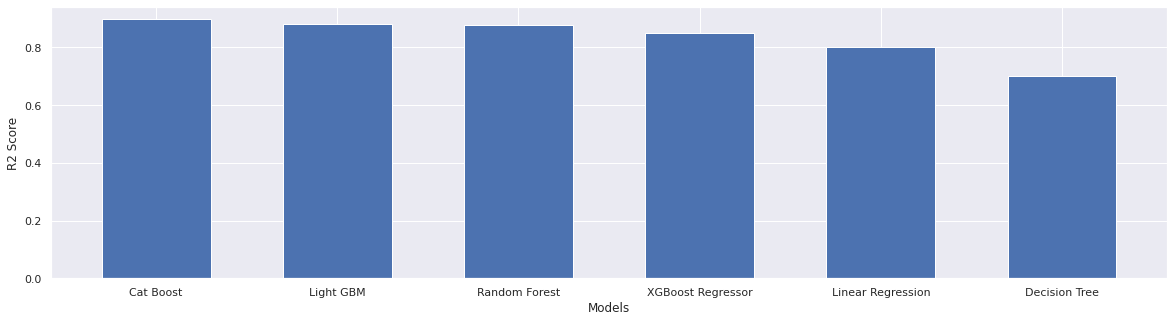

In [27]:
sns.set()
plt.figure(figsize=(20,5))
plt.bar(x = result.index , height = result['R2 Score'],width=0.6)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

We will be using CatBoost , XGBoost and RandomForestRegressor .

Hyperparameters are tuned for each model using optuna as shown below.

In [28]:
import optuna
def objective_cat(trial):
    param={
    'iterations' : trial.suggest_int('iterations',100,200),
    'depth' : trial.suggest_int('depth' , 2,8),
    'learning_rate' : trial.suggest_float('learning_rate',0.03,0.1),
    'verbose': 0,
    'l2_leaf_reg' : trial.suggest_categorical('l2_leaf_reg',[0.2,0.5,1,3])
    }
    
    pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',cb.CatBoostRegressor(**param))
    ])
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    return r2_score(y_test,y_pred)

    

In [29]:
study_cat= optuna.create_study(direction = 'maximize')
study_cat.optimize(objective_cat, n_trials=50)

[I 2021-11-23 08:47:53,955] A new study created in memory with name: no-name-7bfa830c-b2bf-45f4-b189-49e296c6be3a
[I 2021-11-23 08:47:54,056] Trial 0 finished with value: 0.9030662707556947 and parameters: {'iterations': 144, 'depth': 4, 'learning_rate': 0.032227869905785585, 'l2_leaf_reg': 1}. Best is trial 0 with value: 0.9030662707556947.
[I 2021-11-23 08:47:54,098] Trial 1 finished with value: 0.9021704584994577 and parameters: {'iterations': 123, 'depth': 2, 'learning_rate': 0.08780488543691191, 'l2_leaf_reg': 1}. Best is trial 0 with value: 0.9030662707556947.
[I 2021-11-23 08:47:54,172] Trial 2 finished with value: 0.9042460258406647 and parameters: {'iterations': 167, 'depth': 4, 'learning_rate': 0.042136582769741915, 'l2_leaf_reg': 1}. Best is trial 2 with value: 0.9042460258406647.
[I 2021-11-23 08:47:54,238] Trial 3 finished with value: 0.9033923139578289 and parameters: {'iterations': 148, 'depth': 4, 'learning_rate': 0.09377384030943668, 'l2_leaf_reg': 3}. Best is trial 2 

[I 2021-11-23 08:47:58,745] Trial 33 finished with value: 0.9040406287046043 and parameters: {'iterations': 138, 'depth': 4, 'learning_rate': 0.034321091083390036, 'l2_leaf_reg': 0.2}. Best is trial 23 with value: 0.9057429310826464.
[I 2021-11-23 08:47:58,844] Trial 34 finished with value: 0.9039205136817897 and parameters: {'iterations': 171, 'depth': 5, 'learning_rate': 0.044266474500641424, 'l2_leaf_reg': 0.2}. Best is trial 23 with value: 0.9057429310826464.
[I 2021-11-23 08:47:58,955] Trial 35 finished with value: 0.9043270900638675 and parameters: {'iterations': 154, 'depth': 6, 'learning_rate': 0.04865195446387657, 'l2_leaf_reg': 1}. Best is trial 23 with value: 0.9057429310826464.
[I 2021-11-23 08:47:59,033] Trial 36 finished with value: 0.9043644231388372 and parameters: {'iterations': 164, 'depth': 4, 'learning_rate': 0.0565345516793812, 'l2_leaf_reg': 1}. Best is trial 23 with value: 0.9057429310826464.
[I 2021-11-23 08:47:59,099] Trial 37 finished with value: 0.90365848854

In [30]:
best_param_cat = study_cat.best_params

In [31]:
def objective_xgb(trial):
     
    n_estimators = trial.suggest_int("n_estimators", 1000, 5000)
    max_depth = trial.suggest_int("max_depth", 1, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 7, step=2)
    subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)
    reg_alpha = trial.suggest_float("reg_alpha", 0., 1.0, step=0.1)
    reg_lambda = trial.suggest_float("reg_lambda", 0., 1.0, step=0.1)
    
    
    model = xgb.XGBRegressor(n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         gamma=gamma,
                         min_child_weight=min_child_weight,
                         colsample_bytree=colsample_bytree,
                         subsample=subsample,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                         n_jobs=-1
                         )
    
    pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',model)
    ])
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    return r2_score(y_test,y_pred)

    

In [32]:
study_xgb = optuna.create_study(direction = 'maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

[I 2021-11-23 08:48:00,435] A new study created in memory with name: no-name-37e9e6e8-174b-4de8-a80c-9456ced1b06c
[I 2021-11-23 08:48:07,850] Trial 0 finished with value: 0.8504436958235855 and parameters: {'n_estimators': 1562, 'max_depth': 9, 'learning_rate': 0.004431075405505217, 'gamma': 0.2, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.5, 'reg_lambda': 1.0}. Best is trial 0 with value: 0.8504436958235855.
[I 2021-11-23 08:48:21,128] Trial 1 finished with value: 0.7879454852882417 and parameters: {'n_estimators': 3566, 'max_depth': 1, 'learning_rate': 0.002293137294847606, 'gamma': 0.4, 'min_child_weight': 7, 'subsample': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.5, 'reg_lambda': 0.5}. Best is trial 0 with value: 0.8504436958235855.
[I 2021-11-23 08:48:47,194] Trial 2 finished with value: 0.8610322855191307 and parameters: {'n_estimators': 4995, 'max_depth': 8, 'learning_rate': 0.004121465944433248, 'gamma': 0.4, 'min_child_weight': 5, 'subsam

[I 2021-11-23 08:54:49,591] Trial 23 finished with value: 0.869058055465936 and parameters: {'n_estimators': 3101, 'max_depth': 4, 'learning_rate': 0.000851524244791393, 'gamma': 0.8, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'reg_alpha': 0.1, 'reg_lambda': 0.1}. Best is trial 20 with value: 0.8717362606442532.
[I 2021-11-23 08:55:09,754] Trial 24 finished with value: 0.8794692121271265 and parameters: {'n_estimators': 3333, 'max_depth': 5, 'learning_rate': 0.0013839562075499607, 'gamma': 0.9, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_alpha': 0.1, 'reg_lambda': 0.0}. Best is trial 24 with value: 0.8794692121271265.
[I 2021-11-23 08:55:28,223] Trial 25 finished with value: 0.8701876497569554 and parameters: {'n_estimators': 3400, 'max_depth': 6, 'learning_rate': 0.0009672410955335357, 'gamma': 0.9, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 0.0}. Best is trial 24 w

[I 2021-11-23 08:58:44,504] Trial 46 finished with value: 0.901142095324565 and parameters: {'n_estimators': 1666, 'max_depth': 3, 'learning_rate': 0.0034024901312777927, 'gamma': 0.9, 'min_child_weight': 3, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.6000000000000001, 'reg_lambda': 0.5}. Best is trial 46 with value: 0.901142095324565.
[I 2021-11-23 08:58:51,666] Trial 47 finished with value: 0.9013164695888355 and parameters: {'n_estimators': 1688, 'max_depth': 3, 'learning_rate': 0.0033827696193043095, 'gamma': 0.7000000000000001, 'min_child_weight': 5, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.8, 'reg_lambda': 0.6000000000000001}. Best is trial 47 with value: 0.9013164695888355.
[I 2021-11-23 08:58:58,882] Trial 48 finished with value: 0.9004752466328826 and parameters: {'n_estimators': 1711, 'max_depth': 3, 'learning_rate': 0.00400038689069278, 'gamma': 0.7000000000000001, 'min_child_weight': 5, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0

[I 2021-11-23 09:02:07,607] Trial 69 finished with value: -0.07298045161278233 and parameters: {'n_estimators': 1658, 'max_depth': 4, 'learning_rate': 0.00024641762503846735, 'gamma': 0.7000000000000001, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 0.6000000000000001, 'reg_lambda': 0.9}. Best is trial 64 with value: 0.9018273292301814.
[I 2021-11-23 09:02:14,079] Trial 70 finished with value: -1.1417973518662707 and parameters: {'n_estimators': 1304, 'max_depth': 5, 'learning_rate': 2.473337344613793e-06, 'gamma': 0.7000000000000001, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 0.6000000000000001}. Best is trial 64 with value: 0.9018273292301814.
[I 2021-11-23 09:02:21,781] Trial 71 finished with value: 0.8980354498157667 and parameters: {'n_estimators': 1854, 'max_depth': 3, 'learning_rate': 0.006067260772211996, 'gamma': 0.6, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree

[I 2021-11-23 09:06:45,585] Trial 91 finished with value: 0.9012208440410743 and parameters: {'n_estimators': 3883, 'max_depth': 2, 'learning_rate': 0.0029385544635589927, 'gamma': 0.9, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 0.6000000000000001}. Best is trial 83 with value: 0.9019199253963722.
[I 2021-11-23 09:07:04,465] Trial 92 finished with value: 0.900645333325518 and parameters: {'n_estimators': 4127, 'max_depth': 2, 'learning_rate': 0.001283063587699121, 'gamma': 0.9, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 0.6000000000000001, 'reg_lambda': 0.6000000000000001}. Best is trial 83 with value: 0.9019199253963722.
[I 2021-11-23 09:07:22,007] Trial 93 finished with value: 0.9011659849325401 and parameters: {'n_estimators': 3681, 'max_depth': 2, 'learning_rate': 0.003322100095572372, 'gamma': 0.9, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.9, 'reg_alpha': 

In [33]:
best_param_xgb = study_xgb.best_params

In [34]:
def objective_rf(trial):
    param={
        
        'max_depth' : trial.suggest_int('max_depth',2,10),
        'n_estimators' : trial.suggest_int('n_estimators',100,3000)
        
    }
    pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',RandomForestRegressor(**param))
    ])
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    return r2_score(y_test,y_pred)
    

In [35]:
study_rf = optuna.create_study(direction = 'maximize')
study_rf.optimize(objective_rf, n_trials=100)


[I 2021-11-23 09:09:18,229] A new study created in memory with name: no-name-9d5dedbc-dd03-40ea-a7f3-7665736835df
[I 2021-11-23 09:09:19,144] Trial 0 finished with value: 0.8830797423410199 and parameters: {'max_depth': 10, 'n_estimators': 196}. Best is trial 0 with value: 0.8830797423410199.
[I 2021-11-23 09:09:23,349] Trial 1 finished with value: 0.8889169487654955 and parameters: {'max_depth': 8, 'n_estimators': 1646}. Best is trial 1 with value: 0.8889169487654955.
[I 2021-11-23 09:09:27,457] Trial 2 finished with value: 0.8909767162161509 and parameters: {'max_depth': 7, 'n_estimators': 1322}. Best is trial 2 with value: 0.8909767162161509.
[I 2021-11-23 09:09:29,689] Trial 3 finished with value: 0.8870332301023381 and parameters: {'max_depth': 9, 'n_estimators': 994}. Best is trial 2 with value: 0.8909767162161509.
[I 2021-11-23 09:09:31,406] Trial 4 finished with value: 0.8886513650632658 and parameters: {'max_depth': 8, 'n_estimators': 427}. Best is trial 2 with value: 0.890976

[I 2021-11-23 09:12:11,320] Trial 42 finished with value: 0.8971069428678783 and parameters: {'max_depth': 4, 'n_estimators': 1239}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:12:12,872] Trial 43 finished with value: 0.891662663750091 and parameters: {'max_depth': 3, 'n_estimators': 983}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:12:13,698] Trial 44 finished with value: 0.8944718857449813 and parameters: {'max_depth': 5, 'n_estimators': 549}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:12:14,126] Trial 45 finished with value: 0.8965402401820004 and parameters: {'max_depth': 4, 'n_estimators': 304}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:12:18,603] Trial 46 finished with value: 0.8923905636916123 and parameters: {'max_depth': 3, 'n_estimators': 2087}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:12:19,713] Trial 47 finished with value: 0.8951102715331496 and parameters: {

[I 2021-11-23 09:15:12,112] Trial 85 finished with value: 0.8954480628125621 and parameters: {'max_depth': 5, 'n_estimators': 2180}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:15:16,853] Trial 86 finished with value: 0.8971527642919671 and parameters: {'max_depth': 4, 'n_estimators': 2026}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:15:21,882] Trial 87 finished with value: 0.8971897988512092 and parameters: {'max_depth': 4, 'n_estimators': 2134}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:15:25,116] Trial 88 finished with value: 0.8922363362884889 and parameters: {'max_depth': 3, 'n_estimators': 1510}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:15:29,437] Trial 89 finished with value: 0.8959485364579811 and parameters: {'max_depth': 5, 'n_estimators': 1989}. Best is trial 14 with value: 0.8978072876969238.
[I 2021-11-23 09:15:34,381] Trial 90 finished with value: 0.8965886889149963 and parameter

In [36]:
best_param_rf = study_rf.best_params

Creating pipeline for each model with best parameters

In [37]:
pipe_cat = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',cb.CatBoostRegressor(**best_param_cat,verbose=0))
    ])

In [38]:
pipe_xgb = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',xgb.XGBRegressor(**best_param_xgb))
    ])

In [39]:
pipe_rf = pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',RandomForestRegressor(**best_param_rf))
    ])



fitting and predicting using all the 3 pipelines

In [40]:
pipe_cat.fit(x_train,y_train)
pipe_xgb.fit(x_train,y_train)
pipe_rf.fit(x_train,y_train)

y_pred_cat = pipe_cat.predict(x_test)
y_pred_xgb = pipe_xgb.predict(x_test)
y_pred_rf = pipe_rf.predict(x_test)

R2_Score of each pipeline

In [41]:
print(f'cat {r2_score(y_test,y_pred_cat)}')
print(f'XGB {r2_score(y_test,y_pred_xgb)}')
print(f'RF {r2_score(y_test,y_pred_rf)}')

cat 0.9057429310826464
XGB 0.9019199253963722
RF 0.8970827796481676


* Blending all the 3 pipleines by weighted average. Here we have given more weightage to CatBoost model as it is giving high accuracy.

In [42]:
y_final = (6*y_pred_cat + 2.5*y_pred_xgb+ 1.5*y_pred_rf)/10

In [43]:
print(f'final {r2_score(y_test,y_final)}')

final 0.9053350564030835


In [44]:
import pickle
pickle.dump(pipe_cat,open('pipe_cat.pkl','wb'))
pickle.dump(pipe_xgb,open('pipe_xgb.pkl','wb'))
pickle.dump(pipe_rf,open('pipe_rf.pkl','wb'))

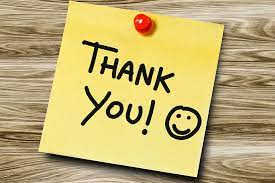